In [1]:
# Cell 1: Import libraries and download data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import shutil

# Download the Cats vs Dogs dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Unzip the data
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define paths to your data
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2025-09-25 08:23:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.129.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.129.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   147MB/s    in 0.4s    

2025-09-25 08:23:32 (147 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Cell 2: Define the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Use 'sigmoid' for binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model_baseline = create_model()
model_baseline.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Cell 3: Train the baseline model without augmentation

# Create data generators (rescale only)
baseline_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = baseline_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Train the baseline model
history_baseline = model_baseline.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15, # You can increase epochs for better results
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5365 - loss: 0.7652 - val_accuracy: 0.5790 - val_loss: 0.6543
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6292 - loss: 0.6358 - val_accuracy: 0.6560 - val_loss: 0.6108
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7094 - loss: 0.5724 - val_accuracy: 0.7110 - val_loss: 0.5713
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7624 - loss: 0.4851 - val_accuracy: 0.6950 - val_loss: 0.6028
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8042 - loss: 0.4096 - val_accuracy: 0.6790 - val_loss: 0.6757
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8466 - loss: 0.3441 - val_accuracy: 0.7050 - val_loss: 0.7026
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9144 - loss: 0.2183 - val_accuracy: 0.7120 - val_loss: 0.7970
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9502 - loss: 0.1187 - val_accuracy: 0.711

In [4]:
# Cell 4: Train a new model with data augmentation

# Create an ImageDataGenerator instance with augmentation parameters
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# A generator for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

augmented_train_generator = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Create and train a new model using the augmented data
model_augmented = create_model()

history_augmented = model_augmented.fit(
    augmented_train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5026 - loss: 0.7367 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.5053 - loss: 0.6930 - val_accuracy: 0.5360 - val_loss: 0.6928
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5121 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5219 - loss: 0.6923 - val_accuracy: 0.5830 - val_loss: 0.6889
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5435 - loss: 0.6915 - val_accuracy: 0.5080 - val_loss: 0.6901
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5423 - loss: 0.6875 - val_accuracy: 0.5870 - val_loss: 0.6697
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5659 - loss: 0.6870 - val_accuracy: 0.5530 - val_loss: 0.7328
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - 

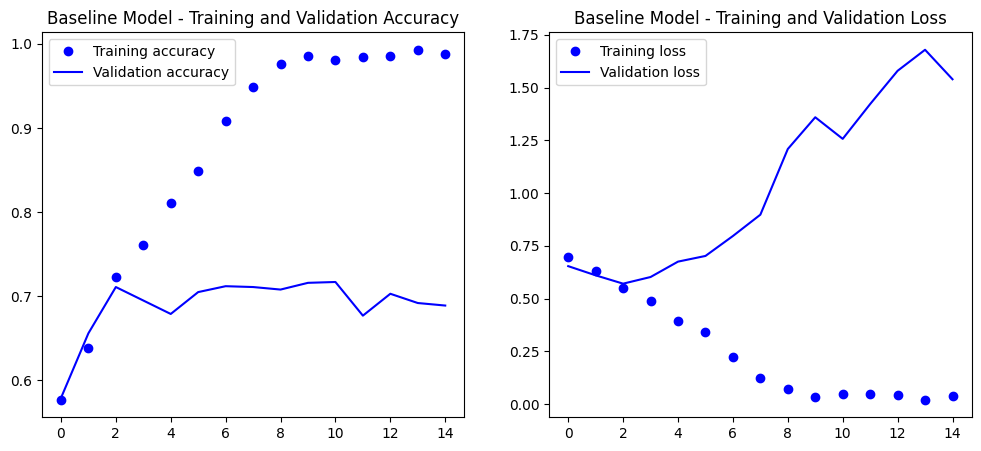

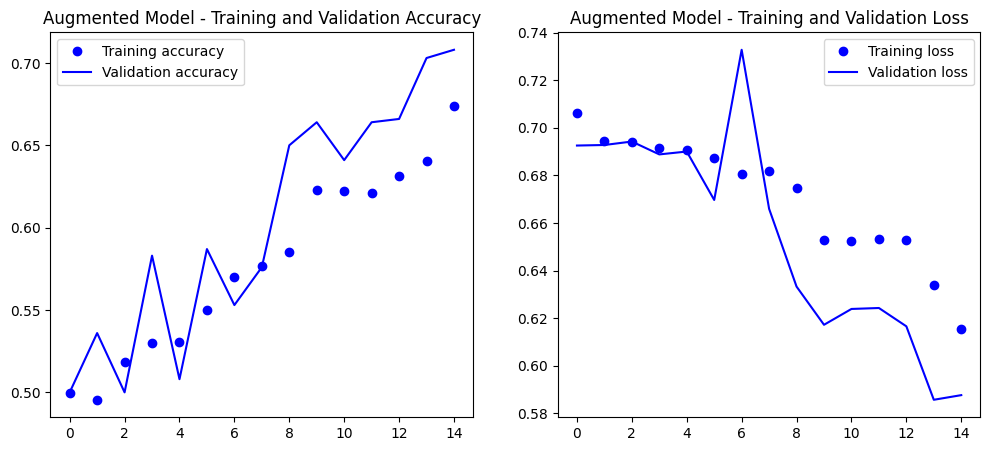

--- Final Performance Comparison ---
Baseline Model - Final Validation Accuracy: 0.6890
Augmented Model - Final Validation Accuracy: 0.7080


In [5]:
# Cell 5: Plot results and compare models
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.legend()

    plt.show()

# Plot for baseline model
plot_history(history_baseline, 'Baseline Model')
# Plot for augmented model
plot_history(history_augmented, 'Augmented Model')

# Print final performance
print("--- Final Performance Comparison ---")
print(f"Baseline Model - Final Validation Accuracy: {history_baseline.history['val_accuracy'][-1]:.4f}")
print(f"Augmented Model - Final Validation Accuracy: {history_augmented.history['val_accuracy'][-1]:.4f}")